In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lf = pd.read_csv("Brain-Body.csv")

In [3]:
lf.head()

,Brain,Body
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
lf.describe()

,Brain,Body
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [5]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   100 non-null    float64
 1   Body    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
lf.isnull().values.any()

False

In [7]:
#Data Cleaning

In [8]:
#1. Variable Identification - Identification of the Target Variable - Life Expectancy

In [9]:
#Univariate analysis - to draw insights 

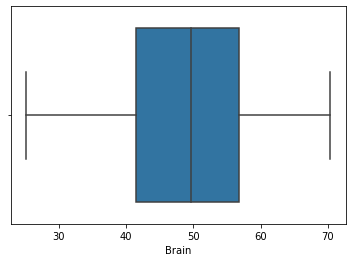

In [10]:
sns.boxplot(x='Brain', data=lf)

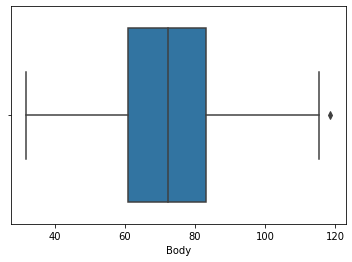

In [11]:
sns.boxplot(x='Body', data = lf)

In [12]:
iqr = lf['Body'].quantile(0.75)-lf['Body'].quantile(0.25)
iqr

22.426494599999998

In [13]:
#Upper limit
up_lt = lf['Body'].quantile(0.75) + 1.5*iqr
up_lt

116.8548220975

In [14]:
outliers = lf[lf['Body']>up_lt]
outliers

,Brain,Body
21,65.416052,118.591217


In [15]:
lf['Body'][21]=lf['Body'].quantile(0.95)

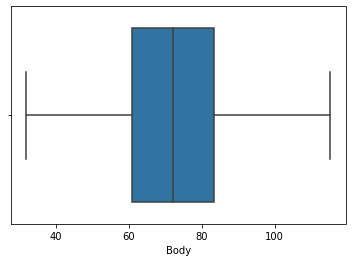

In [16]:
sns.boxplot(x='Body', data = lf)

In [17]:
#Applying Linear Regression Model

In [18]:
x = lf.iloc[:,:-1].values
y = lf.iloc[:,-1].values

In [19]:
x.shape

(100, 1)

In [20]:
y.shape

(100,)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #importing split function

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [23]:
model = LinearRegression()

In [24]:
model = model.fit(x_train,y_train)

In [25]:
y_pred = model.predict(x_test)

In [26]:
y_pred

array([ 81.88398988,  64.38783455,  61.48808696,  69.88322969,
       100.04679585,  63.28798148,  68.19941606,  94.73651243,
        87.20791745,  68.22599213,  74.10200551,  52.45111602,
        50.52732542,  67.09536277,  62.78506087,  83.63956903,
        74.14489614,  90.01540865,  66.59508388,  55.75292287,
        97.45734462,  63.03511213,  70.83328342,  58.30512543,
        76.40896135])

In [27]:
y_test

array([ 85.49806778,  76.61734128,  54.0840548 ,  79.05240617,
       104.2571016 ,  51.39174408,  55.16567715,  83.87856466,
        97.37989686,  66.58814441,  85.23200734,  50.71958891,
        50.39267014,  52.68298337,  61.68403752,  74.08413012,
        82.90598149,  86.52053844,  62.00892325,  52.72173496,
        97.91982104,  79.10282968,  57.25181946,  60.81024665,
        75.38065167])

In [28]:
y_pred = model.predict(x_test)

In [29]:
#Graphical Representation

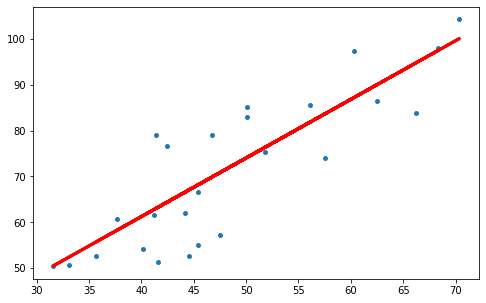

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, s=15)
plt.plot(x_test, y_pred, linewidth = 3, color = 'r')


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [32]:
from math import sqrt
rmse = sqrt(mse)

In [33]:
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)
print("R Squared Value : ", r_squared)

Mean Squared Error :  74.04732273560444
Root Mean Squared Error :  8.605075405573412
R Squared Value :  0.7187800410115042


In [34]:
# Linear Regression Equation - 
# (Body) = 74.04732273560444 + 8.605075405573412(Brain)

In [35]:
#Actual Predictions

In [40]:
y_predict = model.predict([[53]])
y_predict

array([77.88441916])

In [36]:
model.intercept_

10.16847057966151

In [37]:
model.coef_

array([1.27765941])

In [41]:
y_actual = 10.16847057966151 + 1.27765941*53
y_actual

77.88441930966152